<a href="https://colab.research.google.com/github/comaraDOTcom/ml-applications/blob/main/Etivity2/ET5003_Etivity2_CONOROMARA_20151845.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_Etivity-2

In [3]:
#@title Current Date
Today = '2021-08-22' #@param {type:"date"}


In [4]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = "20151845" #@param {type:"string"}
Student_full_name = "Conor O'Mara" #@param {type:"string"}
#@markdown ---

In [5]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = "Draft" #@param ["Draft", "Final"]
Submission = True #@param {type:"boolean"}

# INTRODUCTION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

***The goal is to use advanced Machine Learning methods to predict House price.***

## Problem description & theory

Following on from the last etivity, this etivity also approaches a machine learning problem to predict house prices using a Bayesian multinomial regression model. However, the approach here goes further to use piecewise regression (also referred to as segmentation regression) in an approach to split the data set up into different domains defined by breakpoints where different trained models are applied separately to different data points depending on which region they belong to.

The data we have in this problem is housing data. There is almost 3000 data points on houses sold in Ireland that we can use for training and 500 that we can use as test data. The target variable is price(or expected price) that we will try to predict using other features we have such as:


*   bathrooms
*   bedrooms
*   area
*   beds
*   ber_classification
*   county
*   description block
*   facility
* features 
* latitude
* longitude
* no of units
* property category
* property type
* surface

Using these features, the training dataset can be prepocessed in order to be prepared for machine learning in order to make predictions as to what the price of a house might be.

Piecewise 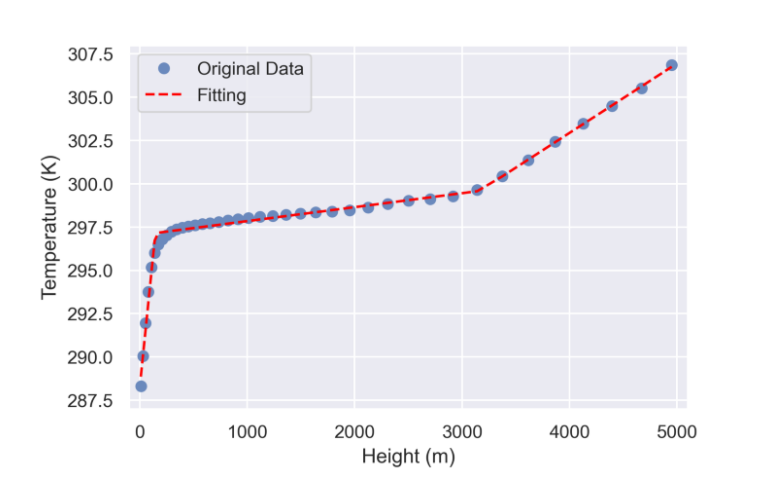

Piecewise regression is a useful approach when the data follows differe $y(x)$ could be split into 3 piecewise divided functions such as for nb break points:
$$ \eta_{1} + \beta_{1}(x - b_{1} ), b_{1} < x \leq b_{2} $$
$$ \eta_{1} + \beta_{2}(x - b_{2} ), b_{2} < x \leq b_{3} $$
$$ \eta_{1} + \beta_{nb}(x - b_{nb - 1} ), b_{nb - 1} < x \leq b_{nb} $$

These separate models are easy to solve (using Pym3) as we found out in etivity 1, however finding the breakpoints is a new step. To do this we can use the Gaussiam mixture clustering method to cluster the data on features and the get the centroids of these clusters to predict what cluster every data point belongs to and there use it to train and fit its regression model. It is a very understandable approach to a problem without increasing the complexity of the model while also not underfitting it with a simple regression model. We have separate values and training routines for $\alpha{i}$ and $\beta_{i}$ for each model.

## Etivity approach
In this etivity we use regression to predict the house prices given the training dataset. But first the data preparation and EDA approach will prepare the dataset for learning. Using thise dataset we will train a full regression model and then a piecewise regression model (where we will find the optimum number of clust 'Mean absolute error' and 'Mean absolute percentage error:
$$ \text{MAE} = \frac{1}{n}\Sigma_{i=1}^{n}|{y_{i} - \hat{y_{i}}}| $$
$$ \text{MAPE} = \frac{1}{n}\Sigma_{i=1}^{n}|\frac{{y_{i} - \hat{y_{i}}}}{y_{i}}| $$


## Imports

In [1]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import arviz as az
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV


# plot settings

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100
sns.set_theme(context='notebook', style='ticks', palette='Accent', font='sans-serif', font_scale=1, color_codes=True, rc=None)

In [2]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET
<a name="dataset"></a>

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-ET5003/ET5003_SEM1_2021-2/tree/main/Week-3). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

### Google drive file paths and IO work.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# path to files
path = '/content/drive/My Drive/Masters/ET5003_Enrique/etivity2/house_data/'

In [8]:
# data
train_data = 'house_train.csv'
test_data = 'house_test.csv'
true_price = 'true_price.csv'

In [9]:
# loading in the training data, test data features and test data targets
df_train = pd.read_csv(path+train_data)
df_test = pd.read_csv(path+test_data)
df_target = pd.read_csv(path + true_price)

### Train dataset

In [10]:
# show first data frame rows 
df_train.head()

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
0,996887,Portmarnock,NaN,NaN,NaN,Dublin,A SELECTION OF 4 AND 5 BEDROOM FAMILY HOMES LO...,prod,NaN,None,53.418216,-6.149329,18.0,NaN,new_development_parent,NaN,NaN
1,999327,Lucan,NaN,NaN,NaN,Dublin,**Last 2 remaining houses for sale ***\n\nOn v...,prod,NaN,None,53.364917,-6.454935,3.0,NaN,new_development_parent,NaN,NaN
2,999559,Rathfarnham,NaN,NaN,NaN,Dublin,Final 4 &amp; 5 Bedroom Homes for Sale\n\nOn V...,prod,NaN,None,53.273447,-6.313821,3.0,NaN,new_development_parent,NaN,NaN
3,9102986,Balbriggan,NaN,NaN,NaN,Dublin,"Glenveagh Taylor Hill, Balbriggan\n\r\n*Ideal ...",prod,NaN,None,53.608167,-6.210914,30.0,NaN,new_development_parent,NaN,NaN
4,9106028,Foxrock,NaN,NaN,NaN,Dublin,*New phase launching this weekend Sat &amp; Su...,prod,NaN,None,53.262531,-6.181527,8.0,NaN,new_development_parent,NaN,NaN


In [11]:
# Generate descriptive statistics
df_train.describe()

,ad_id,bathrooms,beds,latitude,longitude,no_of_units,price,surface
count,2.982000e+03,2931.000000,2931.000000,2982.000000,2982.000000,59.000000,2.892000e+03,2431.000000
mean,1.224065e+07,1.998635,2.979188,53.355991,-6.257175,7.440678,5.323536e+05,318.851787
std,5.793037e+05,1.291875,1.468408,0.086748,0.141906,8.937081,5.678148e+05,4389.423136
min,9.968870e+05,0.000000,0.000000,51.458439,-6.521183,0.000000,1.999500e+04,3.400000
25%,1.226813e+07,1.000000,2.000000,53.298929,-6.314064,2.000000,2.800000e+05,74.100000
50%,1.237758e+07,2.000000,3.000000,53.345497,-6.252254,3.000000,3.800000e+05,100.000000
75%,1.240294e+07,3.000000,4.000000,53.388845,-6.196049,8.000000,5.750000e+05,142.000000
max,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,36.000000,9.995000e+06,182108.539008


In [12]:
def show_nulls(df: pd.DataFrame):
  """
  This function takes a dataframe and returns the number of nulls in each column and the percentage of 
  nulls in a column too.
  """
  nulls = pd.DataFrame(df.isna().sum())
  nulls.rename(columns = {0:'Number of Nulls'}, inplace = True) 
  nulls['% of Nulls'] = nulls['Number of Nulls']/df.shape[0]*100
  cols_with_nulls = nulls[nulls['Number of Nulls'] > 0].T.columns.tolist()
  return nulls

In [13]:
# decide to drop all categorical variables and work with numerical
features = ['ad_id', 'bathrooms', 'beds', 'latitude', 'longitude', 'surface', 'price']

In [14]:
# subset columns
df_train_subset = df_train[features]
del features[-1]

In [15]:
# Look at null % in the training dataframe.
show_nulls(df_train)

,Number of Nulls,% of Nulls
ad_id,0,0.000000
area,0,0.000000
bathrooms,51,1.710262
beds,51,1.710262
ber_classification,677,22.702884
county,0,0.000000
description_block,0,0.000000
environment,0,0.000000
facility,2017,67.639168
features,0,0.000000


In [16]:
# drop null price rows (drops 70 rows)
df_train_subset = df_train_subset[~df_train_subset['price'].isna()]

In [17]:
print(f"There is still {100*df_train_subset.shape[0]/df_train.shape[0]}% of the dataset for training")

There is still 96.98189134808852% of the dataset for training


In [18]:
# impute missing values with the median
for i in features:
  df_train_subset[i].fillna(df_train_subset[i].median(), inplace=True)

In [19]:
# double check no nulls left
show_nulls(df_train_subset)

,Number of Nulls,% of Nulls
ad_id,0,0.0
bathrooms,0,0.0
beds,0,0.0
latitude,0,0.0
longitude,0,0.0
surface,0,0.0
price,0,0.0


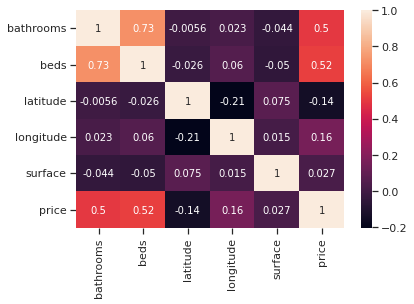

In [20]:
# check the correlcation matrix. It seems bathrooms and beds correlate highly with price.
sns.heatmap(df_train_subset[['bathrooms', 'beds', 'latitude', 'longitude', 'surface', 'price']].corr(), annot = True)
plt.show()

<a name="outliers"></a>
### Removing outliers

In [21]:
#Look at outliers in long and latitude data
def plot_distribtion(df, feature):
    """
    Function plots the histogram and boxplot distribution of the feature side by side.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(f'{feature}')
    sns.histplot(ax=ax1, data=df, x=feature, kde=True)
    sns.boxplot(ax=ax2,data=df,  y=feature, palette="Set2")
    plt.show()

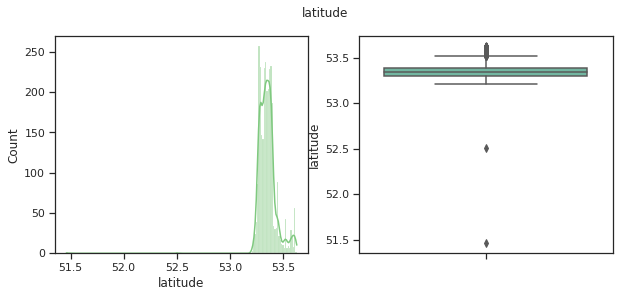

In [22]:
# lots of outliers exist in the longitudinal data
plot_distribtion(df_train_subset, 'latitude')

In [23]:
# removing the outliers from the boxplot (outside of the whiskers)
from matplotlib.cbook import boxplot_stats

outliers = [y for stat in boxplot_stats(df_train_subset['latitude']) for y in stat['fliers']]

In [24]:
#drop rows that contain any value outliers
df_train_subset = df_train_subset[df_train_subset.latitude.isin(outliers) == False]

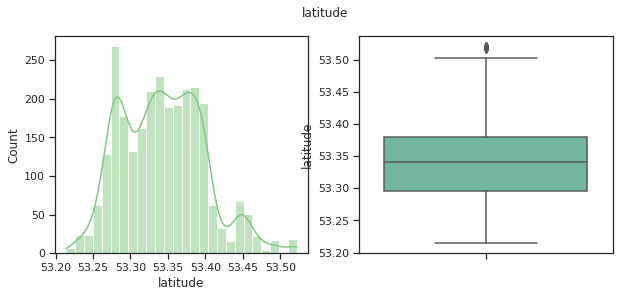

In [25]:
# plot again without outliers (distirbution is easier to plot)
plot_distribtion(df_train_subset, 'latitude')

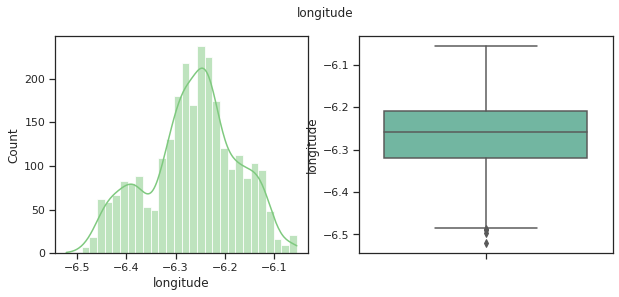

In [26]:
# longitude also looks fine.
plot_distribtion(df_train_subset, 'longitude')

In [27]:
df_test_subset = df_test[features]
df_test_subset.head()

,ad_id,bathrooms,beds,latitude,longitude,surface
0,12373510,2.0,4.0,53.566881,-6.101148,142.0
1,12422623,2.0,3.0,53.362992,-6.452909,114.0
2,12377408,3.0,4.0,53.454198,-6.262964,172.0
3,12420093,4.0,3.0,53.354402,-6.458647,132.4
4,12417338,1.0,3.0,53.336530,-6.393587,88.0


In [28]:
# double check no nulls in test set
show_nulls(df_test_subset)

,Number of Nulls,% of Nulls
ad_id,0,0.0
bathrooms,0,0.0
beds,0,0.0
latitude,0,0.0
longitude,0,0.0
surface,0,0.0


<a name="final-data-prep"></a>
### Prep data for modelling

In [29]:
Xs_train = df_train_subset.iloc[:,1:-1].values 
# train set, output column, cost
ys_train = df_train_subset.iloc[:,-1].values.reshape(-1,1)   

# test set, input columns
Xs_test = df_test_subset.iloc[:,1:].values 
# test set, output column, cost
y_test = df_target.Expected.values

In [30]:
# StandardScaler() will normalize the features (we need a normal distribution for regression) i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([Xs_train,(Xs_train[:,[2]]*Xs_train[:,[3]])])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = np.hstack([Xs_test,(Xs_test[:,[2]]*Xs_test[:,[3]])])
Xn_test = xscaler.transform(Xss_test)

# how did we know how to do this?
ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

## Full Model

In [31]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])
    

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 2,861.2


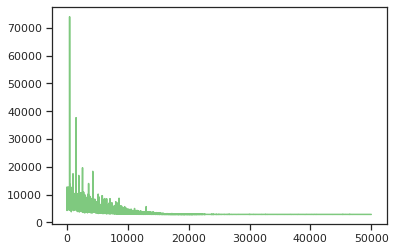

In [32]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);

# samples from the posterior
posterior = approximation.sample(5000)

In [33]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
full_model_mae = np.mean(abs(y_pred_BLR - y_test))
full_model_mape = np.mean(abs(y_pred_BLR - y_test) / y_test)

print("Full model MAE = ",(full_model_mae))
print("Full model MAPE = ",(full_model_mape))

Full model MAE =  213625.93749210465
Full model MAPE =  0.2855303613979247


# Piecewise Regression

<a name="KMeans"></a>
## Clustering

### KMeans Clustering


In [34]:
# use k-means clustering to calculate the sum of the squared distances for k clusters
from sklearn import cluster

inertia = []
for k in range(1,15):
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=20, max_iter=500, random_state=10).fit(Xn_train)
    inertia.append(clustered_data_sklearn.inertia_)

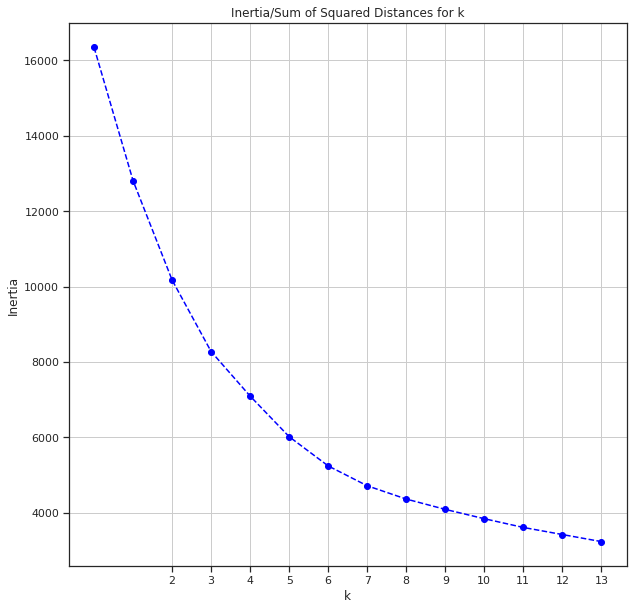

In [35]:
# plot to see if there is a clear elbow
plt.figure(figsize=(10,10))
plt.title('Inertia/Sum of Squared Distances for k')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.xticks(range(2, 30))
plt.grid()
plt.plot(inertia, linestyle='--', marker='o', color='b')

There does not seem to be a clear elbow.

<a name="silhouette"></a>
### Silhouette metric

In [36]:
from sklearn import metrics

silhouette_coefficients = []
   
# Start at 2 clusters for silhouette coefficient
for k in range(2, 15):
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=20, max_iter=500, random_state=10).fit(Xn_train)
    score = metrics.silhouette_score(Xn_train, clustered_data_sklearn.labels_)
    silhouette_coefficients.append(score)

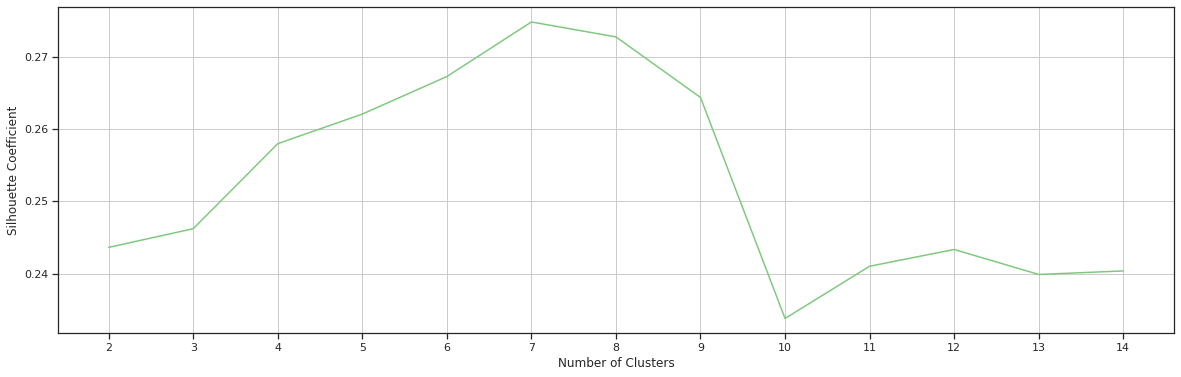

In [37]:
plt.figure(figsize=(20,6))
plt.plot(range(2,15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xticks()
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.grid()
plt.show()

Peak appears at k=7

<a name="gmm"></a>
## Agglomerative clustering (Gaussian mixture method)
Choosing the number of components for the GMM model = 7, we can fit the training and test data together using this unsupervised method using the `latitude` and `longitude` features to calculate centres for each breakpoint.



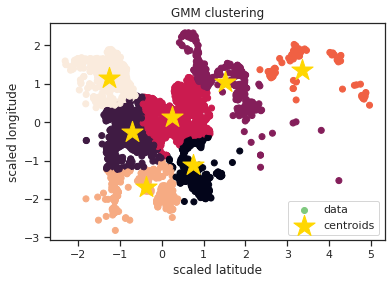

In [38]:
# training gaussian mixture model 
gmm = GaussianMixture(n_components=7)
# clustering by features 2, 3(lat-long)
ind=[2,3]
X_ind = np.vstack([Xn_train[:,ind],Xn_test[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)
labels = gmm.predict(X_ind)
# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1], c = labels, label='data')
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1], c='gold', marker='*', s=500, label='centroids')
plt.title('GMM clustering')
plt.ylabel('scaled longitude')
plt.xlabel('scaled latitude')
plt.legend()
plt.show()

### Clusters

In [39]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))

{0: 274, 1: 502, 2: 279, 3: 979, 4: 38, 5: 257, 6: 395}

In [40]:
# test clusters
clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

{0: 34, 1: 98, 2: 44, 3: 170, 4: 43, 5: 32, 6: 79}

In [41]:
# create the training and target dataset for cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_test[clusters_test==0,:]

ylog0 = np.log(ys_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [42]:
# create the training and target dataset for cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_test[clusters_test==1,:]
ylog1 = np.log(ys_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [43]:
# create the training and target dataset for cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_test[clusters_test==2,:]
ylog2 = np.log(ys_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)

In [44]:
# create the training and target dataset for cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_test[clusters_test==3,:]
ylog3 = np.log(ys_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

In [45]:
# create the training and target dataset for cluster 4
Xn4 = Xn_train[clusters_train==4,:]
Xtestn4 = Xn_test[clusters_test==4,:]
ylog4 = np.log(ys_train.astype('float')[clusters_train==4,:])
yscaler4 = StandardScaler().fit(ylog4)
yn4 = yscaler4.transform(ylog4)

In [46]:
# create the training and target dataset for cluster 5
Xn5 = Xn_train[clusters_train==5,:]
Xtestn5 = Xn_test[clusters_test==5,:]
ylog5 = np.log(ys_train.astype('float')[clusters_train==5,:])
yscaler5 = StandardScaler().fit(ylog5)
yn5 = yscaler5.transform(ylog5)

In [47]:
# create the training and target dataset for cluster 7
Xn6 = Xn_train[clusters_train==6,:]
Xtestn6 = Xn_test[clusters_test==6,:]
ylog6 = np.log(ys_train.astype('float')[clusters_train==6,:])
yscaler6 = StandardScaler().fit(ylog6)
yn6 = yscaler6.transform(ylog6)

In [48]:
# look at the different scales of each cluster
print(yscaler0.scale_)
print(yscaler1.scale_)
print(yscaler2.scale_)
print(yscaler3.scale_)
print(yscaler4.scale_)
print(yscaler5.scale_)
print(yscaler6.scale_)

[0.52543887]
[0.5167521]
[0.62984856]
[0.56277226]
[0.42207228]
[0.37313777]
[0.67358679]


## Piecewise Model
Run each picewise model on its training dataset with its training dataset.

In [49]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(5000)

Finished [100%]: Average Loss = 292.31


In [50]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])

with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior1 = approximation.sample(5000)

Finished [100%]: Average Loss = 429.98


In [51]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 2d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])

with model_2:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior2 = approximation.sample(5000)

Finished [100%]: Average Loss = 292.47


In [52]:
# model_3
with pm.Model() as model_3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn3.T)
  # likelihood, be sure that observed is a 3d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])

with model_3:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior3 = approximation.sample(5000)

Finished [100%]: Average Loss = 953.57


In [53]:
# model_4
with pm.Model() as model_4:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn4.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn4.T)
  # likelihood, be sure that observed is a 4d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn4[:,0])

with model_4:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior4 = approximation.sample(5000)

Finished [100%]: Average Loss = 81.586


In [54]:
# model_5
with pm.Model() as model_5:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn5.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn5.T)
  # likelihood, be sure that observed is a 5d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn5[:,0])

with model_5:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior5 = approximation.sample(5000)

Finished [100%]: Average Loss = 276.35


In [55]:
# model_6
with pm.Model() as model_6:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn6.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn6.T)
  # likelihood, be sure that observed is a 5d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn6[:,0])

with model_6:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior6 = approximation.sample(5000)

Finished [100%]: Average Loss = 475.35


##Simulations

In [56]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

### On each cluster

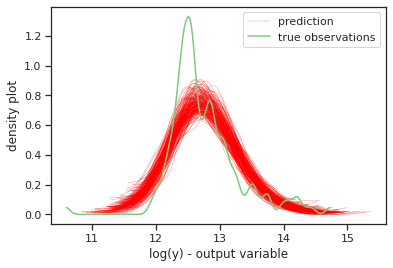

In [57]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

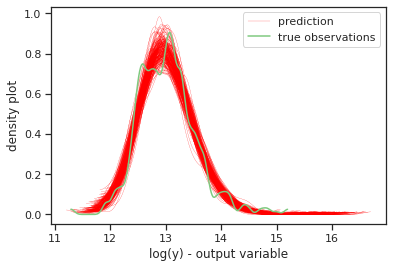

In [58]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

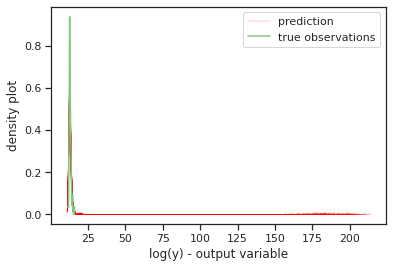

In [59]:
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior1['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

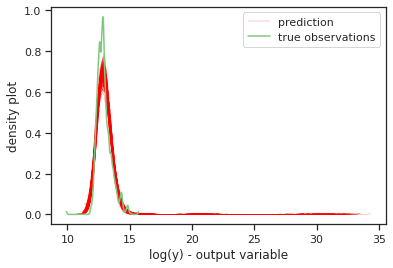

In [60]:
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior1['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

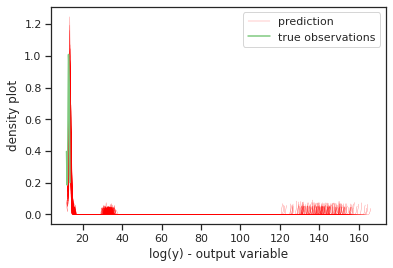

In [61]:
Ypred4 = yscaler4.inverse_transform(ppc(posterior4['alpha'],posterior1['beta'],posterior4['sigma_n'],Xn4,  nsamples=200))
for i in range(Ypred4.shape[0]):
    az.plot_dist( Ypred4[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred4[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog4,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

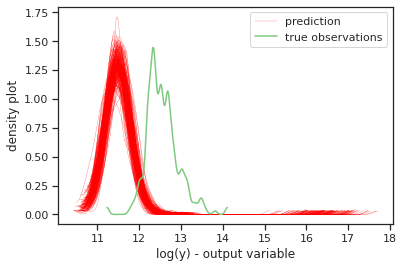

In [62]:
Ypred5 = yscaler5.inverse_transform(ppc(posterior5['alpha'],posterior1['beta'],posterior5['sigma_n'],Xn5,  nsamples=200))
for i in range(Ypred5.shape[0]):
    az.plot_dist( Ypred5[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred5[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog5,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

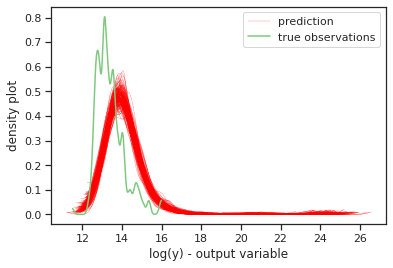

In [63]:
Ypred6 = yscaler6.inverse_transform(ppc(posterior6['alpha'],posterior1['beta'],posterior6['sigma_n'],Xn6,  nsamples=200))
for i in range(Ypred6.shape[0]):
    az.plot_dist( Ypred6[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred6[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog6,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

## Overall

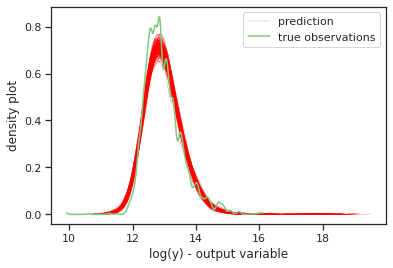

In [64]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)
Ypred4 = ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xn4,  nsamples=200)
Ypred5 = ppc(posterior5['alpha'],posterior5['beta'],posterior5['sigma_n'],Xn5,  nsamples=200)
Ypred6 = ppc(posterior6['alpha'],posterior6['beta'],posterior6['sigma_n'],Xn6,  nsamples=200)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3),
                 yscaler4.inverse_transform(Ypred4),
                 yscaler5.inverse_transform(Ypred5),
                 yscaler6.inverse_transform(Ypred6)])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3, ylog4, ylog5, ylog6])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

## Test set performance

In [65]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))
print("Size Cluster0", np.sum(clusters_test==0), ", MAE Cluster0=",
      (np.mean(abs(y_pred_BLR0 - y_test[clusters_test==0]))))

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))
print("Size Cluster1", np.sum(clusters_test==1), ", MAE Cluster1=",
      (np.mean(abs(y_pred_BLR1 - y_test[clusters_test==1]))))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))
print("Size Cluster2", np.sum(clusters_test==2), ", MAE Cluster2=",
      (np.mean(abs(y_pred_BLR2 - y_test[clusters_test==2]))))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))
print("Size Cluster3", np.sum(clusters_test==3), ", MAE Cluster3=",
      (np.mean(abs(y_pred_BLR3 - y_test[clusters_test==3]))))

# cluster 4
y_pred_BLR4 = np.exp(yscaler4.inverse_transform(np.mean(posterior4['alpha']) 
              + np.dot(np.mean(posterior4['beta'],axis=0), Xtestn4.T)))
print("Size Cluster4", np.sum(clusters_test==4), ", MAE Cluster4=",
      (np.mean(abs(y_pred_BLR4 - y_test[clusters_test==4]))))

# cluster 5
y_pred_BLR5 = np.exp(yscaler5.inverse_transform(np.mean(posterior5['alpha']) 
              + np.dot(np.mean(posterior5['beta'],axis=0), Xtestn5.T)))
print("Size Cluster5", np.sum(clusters_test==5), ", MAE Cluster5=",
      (np.mean(abs(y_pred_BLR5 - y_test[clusters_test==5]))))

y_pred_BLR6 = np.exp(yscaler6.inverse_transform(np.mean(posterior6['alpha']) 
              + np.dot(np.mean(posterior6['beta'],axis=0), Xtestn6.T)))
print("Size Cluster6", np.sum(clusters_test==6), ", MAE Cluster6=",
      (np.mean(abs(y_pred_BLR6 - y_test[clusters_test==6])), "MAPE Cluster6=", np.mean(abs(y_pred_BLR6 - y_test[clusters_test==6]) / y_test[clusters_test==6])))

# joint
joint=np.hstack([abs(y_pred_BLR0 - y_test[clusters_test==0]),
                 abs(y_pred_BLR1 - y_test[clusters_test==1]),
                 abs(y_pred_BLR2 - y_test[clusters_test==2]),
                 abs(y_pred_BLR3 - y_test[clusters_test==3]),
                 abs(y_pred_BLR4 - y_test[clusters_test==4]),
                 abs(y_pred_BLR5 - y_test[clusters_test==5]),
                 abs(y_pred_BLR6 - y_test[clusters_test==6])])

joint_mape =np.hstack([abs(y_pred_BLR0 - y_test[clusters_test==0]) / y_test[clusters_test==0],
                 abs(y_pred_BLR1 - y_test[clusters_test==1]) / y_test[clusters_test==1],
                 abs(y_pred_BLR2 - y_test[clusters_test==2]) / y_test[clusters_test==2],
                 abs(y_pred_BLR3 - y_test[clusters_test==3]) / y_test[clusters_test==3],
                 abs(y_pred_BLR4 - y_test[clusters_test==4]) / y_test[clusters_test==4],
                 abs(y_pred_BLR5 - y_test[clusters_test==5]) / y_test[clusters_test==5],
                 abs(y_pred_BLR6 - y_test[clusters_test==6]) / y_test[clusters_test==6]])

# MAE
print("MAE=",np.mean(joint))
print("MAPE=",np.mean(joint_mape))

Size Cluster0 34 , MAE Cluster0= 92594.3128488704
Size Cluster1 98 , MAE Cluster1= 193805.4374820095
Size Cluster2 44 , MAE Cluster2= 152927.11419191302
Size Cluster3 170 , MAE Cluster3= 183114.58234397965
Size Cluster4 43 , MAE Cluster4= 110040.91548896862
Size Cluster5 32 , MAE Cluster5= 84188.80235310823
Size Cluster6 79 , MAE Cluster6= (270902.44700389856, 'MAPE Cluster6=', 0.25384429294398525)
MAE= 177653.01177530468
MAPE= 0.24088617760413905


### PPC on the Test set



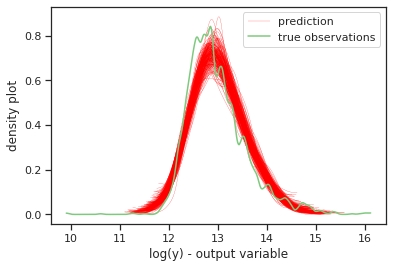

In [66]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xtestn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xtestn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xtestn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xtestn3,  nsamples=200)
Ypred4 = ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xtestn4,  nsamples=200)
Ypred5 = ppc(posterior5['alpha'],posterior5['beta'],posterior5['sigma_n'],Xtestn5,  nsamples=200)
Ypred6 = ppc(posterior6['alpha'],posterior6['beta'],posterior6['sigma_n'],Xtestn6,  nsamples=200)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3),
                 yscaler4.inverse_transform(Ypred4),
                 yscaler5.inverse_transform(Ypred5),
                 yscaler6.inverse_transform(Ypred6)])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3, ylog4, ylog5, ylog6])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

In [67]:
print(Xtestn0.shape)
print(Xtestn1.shape)
print(Xtestn2.shape)
print(Xtestn3.shape)
print(Xtestn4.shape)
print(Xtestn5.shape)
print(Xtestn6.shape)

(34, 6)
(98, 6)
(44, 6)
(170, 6)
(43, 6)
(32, 6)
(79, 6)


# Summary


---



## E-tivity summary

This e-tivity provided an interesting foray into piecewise probabilistic linear regression to solve complex datasets with a simple and explainable model. Further more this approach coupled very well with a selection of [SKlearn's clustering methods](https://scikit-learn.org/stable/modules/clustering.html) (namely Gaussian mixture models, KMeans clustering models and one of the library's evaluation metrics called the Silhouette coefficient. Using these 3 clustering methods provided a nuanced approach to locate the number and locations of the breakpoints in our multidimensional feature space. I found this approach very interesting that leveraging these clustering methods enabled us to keep the complexity of our model low and enhance our performance.


 <br/><br/>

---

### Conclusions & Results
The full probabilistic regression model was outperformed by the piecewise probabilitistic regression model using the mean absolute error (MAE) and mean absolute percentage error (MAPE) as evaluation criterion.

|      | Full model | Piecewise model |
|------|------------|-----------------|
| MAE  | 213,244    | 193,129         |
| MAPE | 0.284      | 0.258           |

There appears to be about a 2.5% improvement in the model performance using the Piecewise Bayesian linear regression model.

There was a nice link between this model and previous models on data analytics where we had covered transformations of variables to a normal distribution, heatmaps, boxplots, imputing values and other data preparation techniques to enhance the training dataset. In fact I found this was the key to the problem, in order to not have a cluster on an outlier which would have wasted a centroid at the cost of a dimension.

Working with PyMC3 and the Posterior predictive checks (PPC) and their distribution plots versus the real data was good visualization of the results.
 
 <br/><br/>

---


### Pros-cons of dataset, techniques and methods
The dataset was large and had many features. The training dataset after preparation consisted of almost 2750 samples with a test set of 500 samples. 

From explorations of the dataset, we were able to remove outliers in the variables we decided to keep, impute missing values for data that was missing for some features and create feature crosses in order to provide more features for the model to train on. Exploring the dataset was a task that I iterated upon, which is a very realistic approach. I went from just dropping all rows with `NaNs` and adding no new features to see the performance on the model on test data with a basic training set, to enhancing the dataset which had a positive effect on reducing `MAPE Mean absolute percentage error` and `MAE (Mean absolute error)`. The final approach to my dataset preparation can be found in the [dataset prep section of the notebook](#dataset).

A more in depth analysis of clustering methods was required to use piecewise regression with was an initial obstacle. KMeans clustering with the inertia metric [failed to provide a clear value](#KMeans) for K the number of breakpoints to use in our piecewise model. Using the silhouette metric with KMeans [showed a clear peak of K = 7](#silhouette). The silhouette metric seems to also take into account the distance between the clusters. Then [fitting the GMM model](#gmm) we were able to assign every datapoint to a class and hence a piecewise model that would be used to predict their target variable. While this method seems to show good results in this version of the notebook, I found I had to revisit the data preparation approach to obtain clear separation as I found the GMM was very susceptible to being thrown off by the appearance of outliers. Once removing these [outliers](#outliers) the GMM plot proved to be more insightful.

While the full model for the whole dataset did not provide as low a mean absolute it provided reasonable results for much less coding and computational work (there was no clustering or multiple models required). However the pay off with the piecewise regression model was apparent with it's lower `MAPE` results on the dataset. On further reflection I find the piecewise regression approach particularly intuitive for problems like this where the feature space (in this case the landscape of Dublin and the features of its houses) vary in price in different areas of the city. By training different models for different breakpoints enables the models to fit subleties in the areas easier (without overfitting as the Bayesian models come with uncertainties in their probability distributions.

### Peer discussion and comments.

On the forums I had some good discussions and learnt the following:

-  With Robert Barrett and James Gibbons. I was unsure whether of not the GMM model should be trained on the test data as well. James showed that training it with and without the test data didn't affect the `MAPE` value significantly in the end. However Robert said we can think of the GMM as part of our full piecewise model and as it's unsupervised modelling in the clustering not requiring the labels of the test data.

- Ken decided to one hot encode the property variable which seemed like a good approach to binarise them out. I would have added this to my workflow but at the risk of it affecting my number of clusters and conclusions I decided to leave it, but will include it in future analysis. I seemed to lead to a lower `MAPE`.

- Discussion on the Google machine learning crash course indicated that floating point representations of lat-long would perform more poorly than a bucketizes representation of lat-long (which I didn't do). Instead if we bucketize the combination (feature cross) of lat and long the model will learn a different weight $\beta_{i}$ for each bucket.


# References
- (Dorpe, 2018), Preprocessing with sklearn: a complete and comprehensive guide https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9
- (Germano, 2020), When a single line is not enough to fit our data, piecewise linear regression can come to our rescue. https://towardsdatascience.com/piecewise-linear-regression-model-what-is-it-and-when-can-we-use-it-93286cfee452
- (Google Machine Learning Crash Course), Feature Crosses: Encoding Nonlinearity https://developers.google.com/machine-learning/crash-course/feature-crosses/crossing-one-hot-vectors
- (Half-Cauchy Distribution — Probability Distribution Explorer Documentation, n.d.) https://distribution-explorer.github.io/continuous/halfcauchy.html
- (Rousseeuw, P. J. 1987), Silhouettes: A graphical aid to the interpretation and validation of cluster analysis. Journal of Computational and Applied Mathematics, 20(C), 53–65. https://doi.org/10.1016/0377-0427(87)90125-7


In [68]:

#Export PDF file of the notebook to Google drive
%%capture
pdf_path = '/content/drive/My Drive/Masters/ET5003_Enrique/etivity2/pdf/'
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('ET5003_Etivity2_CONOROMARA_20151845.ipynb')

ValueError: ignored